In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Leemos el dataframe 
df = pd.read_csv('ValoresAtipicosMilan.csv', index_col="id")
df.head(3)

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
6400,2024-09-17,The Studio Milan,13822,Francesca,2009-04-17,Unknown,f,f,"Milan, Lombardy, Italy",TIBALDI,...,5.00,5.00,5.00,5.00,4.56,4.67,1.0,0.0,1.0,0.0
23986,2024-09-17,""" Characteristic Milanese flat""",95941,Jeremy,2010-03-19,within an hour,f,t,Milan,NAVIGLI,...,4.67,4.22,4.59,4.74,4.70,4.48,1.0,1.0,0.0,0.0
40470,2024-09-17,Giacinto Cosy & clean flat near MM1,174203,Giacinto,2010-07-20,within an hour,f,t,Milan,VIALE MONZA,...,4.71,4.83,4.98,4.88,4.44,4.51,2.0,2.0,0.0,0.0


In [3]:
#Filtramos el dataframe para Entire home/apt
df_filtrado = df[df['room_type'] == 'Entire home/apt']
df1 = df_filtrado[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df1

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
23986,Entire home/apt,180.0,0.200000,f,4.0,1.0,4.22,f,t,Entire rental unit
40470,Entire home/apt,80.0,0.380000,f,4.0,1.0,4.83,f,t,Entire rental unit
46536,Entire home/apt,110.0,0.750000,f,5.0,1.0,4.64,f,t,Entire rental unit
59226,Entire home/apt,180.0,0.900000,f,2.0,1.0,3.89,f,t,Entire rental unit
81202,Entire home/apt,180.0,0.900000,f,2.0,1.0,4.40,f,t,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...
1246437889383448876,Entire home/apt,114.0,0.848627,f,4.0,1.0,4.85,t,t,Entire rental unit
1247041247550267557,Entire home/apt,230.0,1.000000,t,2.0,1.0,4.85,t,f,Entire rental unit
1247055338618822537,Entire home/apt,273.0,1.000000,t,2.0,1.0,4.85,t,f,Entire rental unit


In [4]:
#Convertimos las variables de tipo string a enteros 
df1.loc[:, 'host_is_superhost'] = df1['host_is_superhost'].map({'t': 1, 'f': 0})
df1.loc[:, 'instant_bookable'] = df1['instant_bookable'].map({'t': 1, 'f': 0})
df1.loc[:, 'host_identity_verified'] = df1['host_identity_verified'].map({'t': 1, 'f': 0})
df1.loc[:, 'property_type'] = df1['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
})
df1


,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
23986,Entire home/apt,180.0,0.200000,0,4.0,1.0,4.22,0,1,1
40470,Entire home/apt,80.0,0.380000,0,4.0,1.0,4.83,0,1,1
46536,Entire home/apt,110.0,0.750000,0,5.0,1.0,4.64,0,1,1
59226,Entire home/apt,180.0,0.900000,0,2.0,1.0,3.89,0,1,1
81202,Entire home/apt,180.0,0.900000,0,2.0,1.0,4.40,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1246437889383448876,Entire home/apt,114.0,0.848627,0,4.0,1.0,4.85,1,1,1
1247041247550267557,Entire home/apt,230.0,1.000000,1,2.0,1.0,4.85,1,0,1
1247055338618822537,Entire home/apt,273.0,1.000000,1,2.0,1.0,4.85,1,0,1


In [5]:
#Funcion de regresion lineal simple 
from sklearn.linear_model import LinearRegression

def regresion_lineal(df, x_col, y_col):
    # Seleccionar las columnas de las variables independientes y dependientes
    X = df[[x_col]].values  # Variable independiente (X)
    y = df[y_col].values   # Variable dependiente (y)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X, y)

    # Hacer las predicciones usando los datos de X
    y_pred = model.predict(X)  # Realizar predicciones

    # Insertar las predicciones como una nueva columna en el DataFrame
    # Crear un nombre único para la columna de predicciones
    nombre_columna = f"Predic_{x_col}_{y_col}"
    df.insert(0, nombre_columna, y_pred)

    # Coeficientes de la regresión (pendiente y ordenada al origen)
    pendiente = model.coef_[0]  # La pendiente (m)
    ordenada = model.intercept_  # La ordenada al origen (b)

    # Crear la ecuación de la recta
    ecuacion = f"y = {pendiente:.4f}x + {ordenada:.4f}"

    # Graficar los datos reales y las predicciones
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.flatten(), y=y, color='blue', label='Datos reales')
    sns.scatterplot(x=X.flatten(), y=y_pred, color='red', label='Predicciones')
    plt.title(f'Regresión lineal: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

    # Coeficiente de determinación (R^2)
    coef_deter = model.score(X, y)  # Coeficiente de determinación (R^2)

    # Coeficiente de correlación (r)
    coef_correl = np.sqrt(coef_deter)  # Coeficiente de correlación (r)

    # Devolver los coeficientes y las predicciones
    return coef_correl, coef_deter, ecuacion

**Entire home/apt**

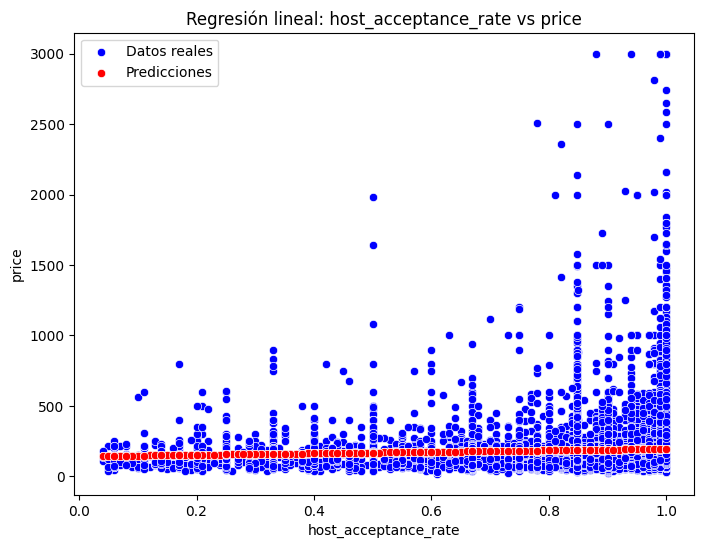

Coeficiente de correlación (r): 0.047160715609568304
Coeficiente de determinación (R^2): 0.0022241330968065798
Ecuación de la recta: y = 52.6061x + 142.2679


In [6]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

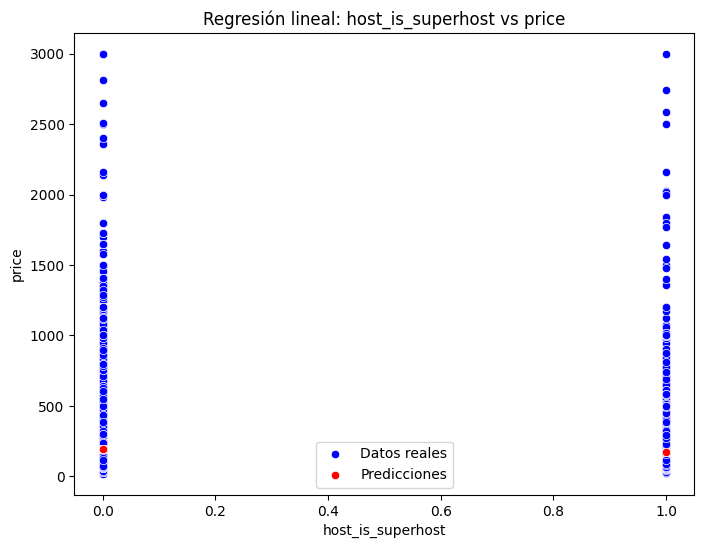

Coeficiente de correlación (r): 0.06145753697611632
Coeficiente de determinación (R^2): 0.003777028851170705
Ecuación de la recta: y = -24.8156x + 197.3459


In [7]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

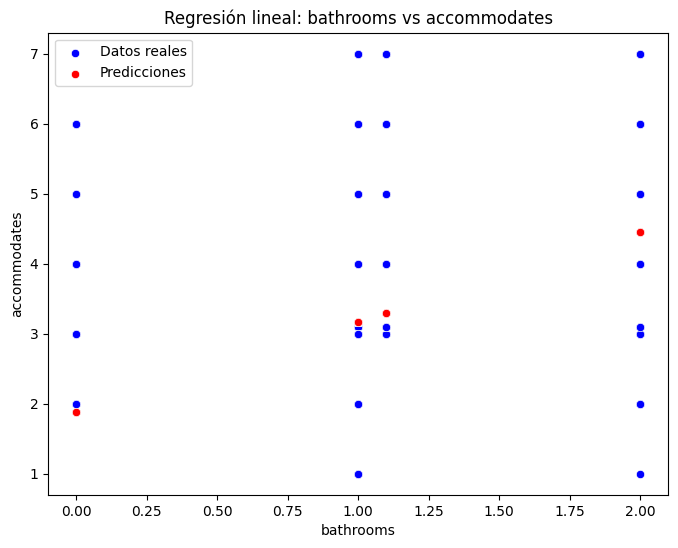

Coeficiente de correlación (r): 0.34777977929777537
Coeficiente de determinación (R^2): 0.12095077488840933
Ecuación de la recta: y = 1.2816x + 1.8884


In [8]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

	

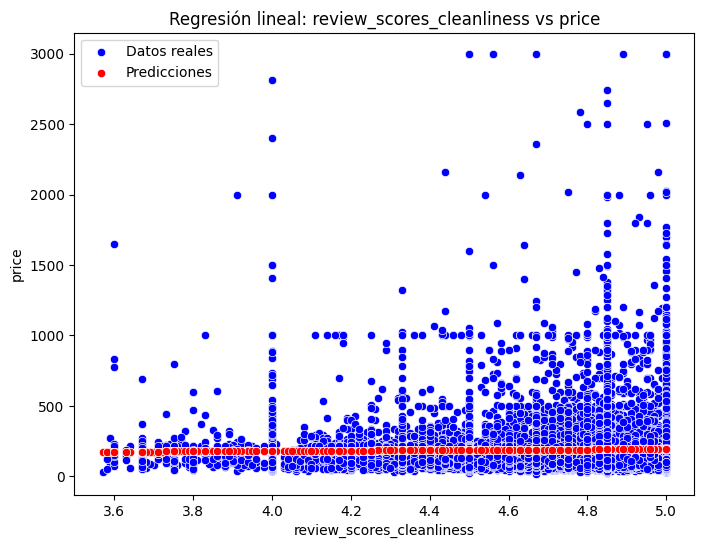

Coeficiente de correlación (r): 0.018779607085431704
Coeficiente de determinación (R^2): 0.00035267364228319664
Ecuación de la recta: y = 13.0204x + 128.1943


In [9]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

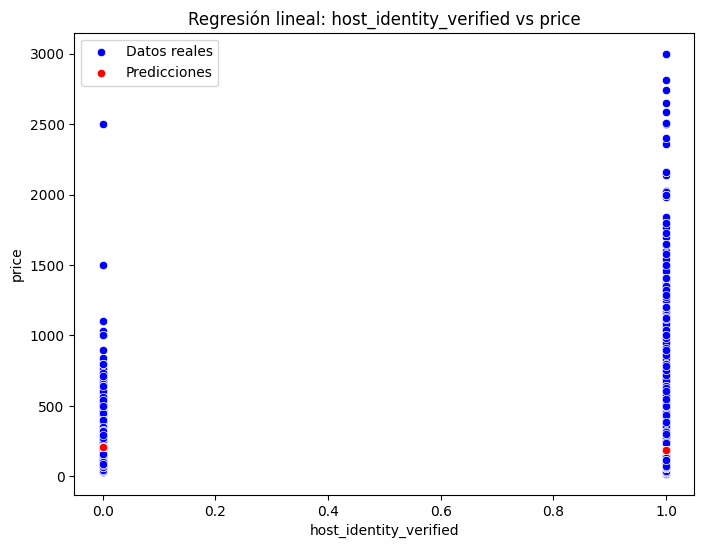

Coeficiente de correlación (r): 0.023406509534781038
Coeficiente de determinación (R^2): 0.0005478646886017957
Ecuación de la recta: y = -18.7445x + 208.0432


In [10]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

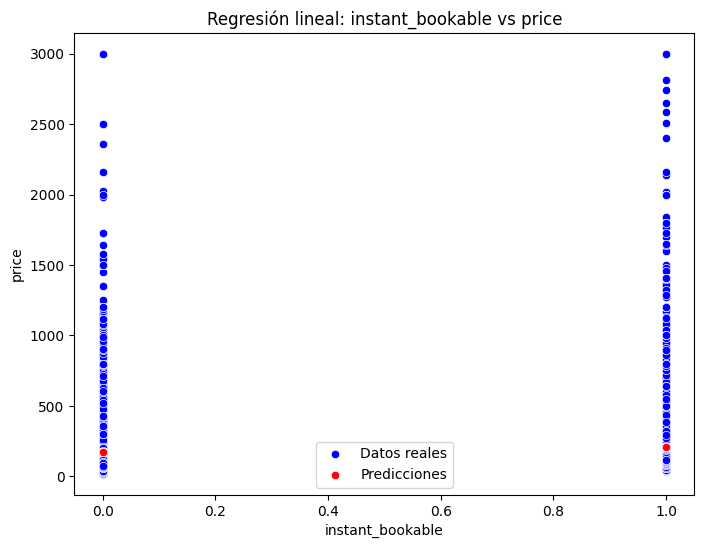

Coeficiente de correlación (r): 0.08839960619459843
Coeficiente de determinación (R^2): 0.007814490375360084
Ecuación de la recta: y = 32.1600x + 174.1653


In [11]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

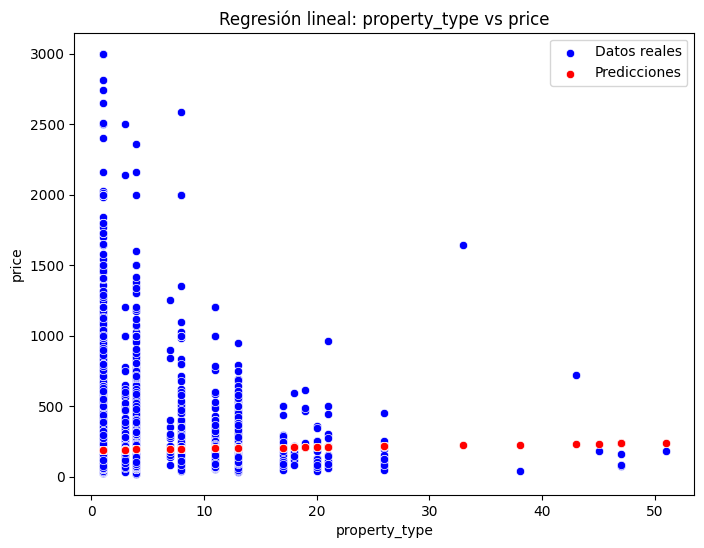

Coeficiente de correlación (r): 0.014886512248559736
Coeficiente de determinación (R^2): 0.00022160824692651904
Ecuación de la recta: y = 1.0245x + 188.0162


In [12]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

In [13]:
#Filtramos el dataframe para Private room
df_filtrado2 = df[df['room_type'] == 'Private room']
df2 = df_filtrado2[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df2

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
6400,Private room,100.0,0.900000,f,1.0,1.1,5.00,f,f,Private room in rental unit
84741,Private room,48.0,1.000000,f,2.0,1.0,4.63,f,t,Private room in loft
405089,Private room,95.0,1.000000,f,1.0,1.0,4.79,t,t,Private room in condo
406218,Private room,60.0,0.690000,f,1.0,1.0,4.83,f,t,Private room in rental unit
409123,Private room,27.0,0.900000,f,1.0,1.0,4.60,f,f,Private room in rental unit
...,...,...,...,...,...,...,...,...,...,...
1238164536165830134,Private room,1000.0,1.000000,f,2.0,2.0,4.85,t,t,Private room in rental unit
1240494054969130978,Private room,52.0,0.930000,t,1.0,1.0,4.85,f,t,Private room in rental unit
1242601824491486201,Private room,300.0,0.848627,f,2.0,1.0,4.85,f,t,Private room in rental unit


In [14]:
#Convertimos las variables de tipo string a enteros 
df2.loc[:, 'host_is_superhost'] = df2['host_is_superhost'].map({'t': 1, 'f': 0})
df2.loc[:, 'instant_bookable'] = df2['instant_bookable'].map({'t': 1, 'f': 0})
df2.loc[:, 'host_identity_verified'] = df2['host_identity_verified'].map({'t': 1, 'f': 0})
df2.loc[:, 'property_type'] = df2['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
})
df2

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
6400,Private room,100.0,0.900000,0,1.0,1.1,5.00,0,0,0
84741,Private room,48.0,1.000000,0,2.0,1.0,4.63,0,1,2
405089,Private room,95.0,1.000000,0,1.0,1.0,4.79,1,1,5
406218,Private room,60.0,0.690000,0,1.0,1.0,4.83,0,1,0
409123,Private room,27.0,0.900000,0,1.0,1.0,4.60,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1238164536165830134,Private room,1000.0,1.000000,0,2.0,2.0,4.85,1,1,0
1240494054969130978,Private room,52.0,0.930000,1,1.0,1.0,4.85,0,1,0
1242601824491486201,Private room,300.0,0.848627,0,2.0,1.0,4.85,0,1,0


**Private room**

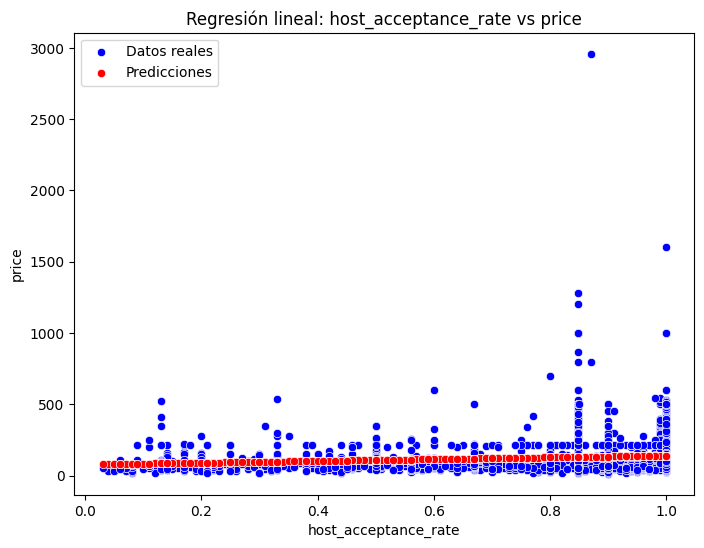

Coeficiente de correlación (r): 0.12065896102834686
Coeficiente de determinación (R^2): 0.014558584876440128
Ecuación de la recta: y = 62.7692x + 77.2813


In [15]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

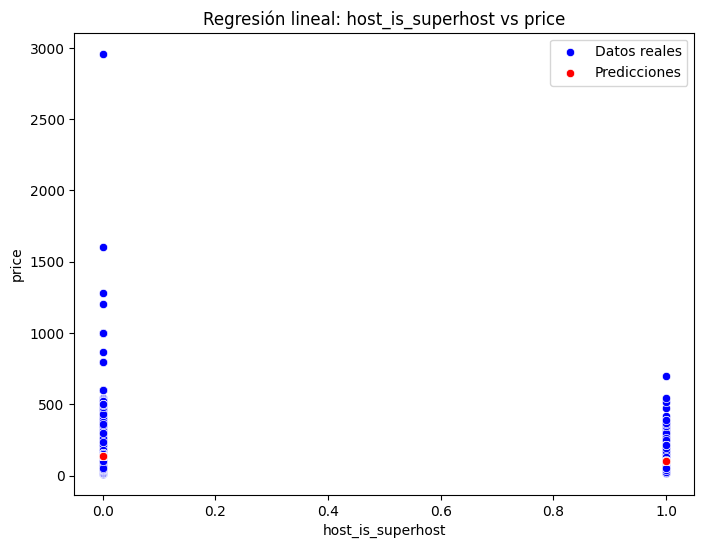

Coeficiente de correlación (r): 0.14284347448591184
Coeficiente de determinación (R^2): 0.02040425820320735
Ecuación de la recta: y = -39.3669x + 138.3829


In [16]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

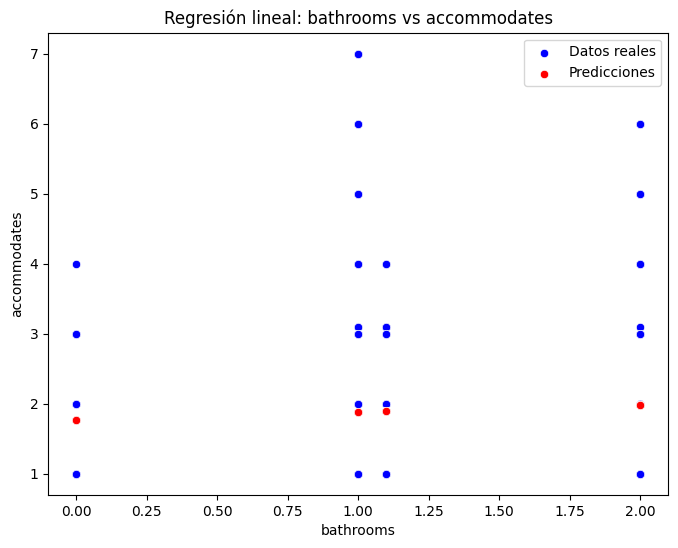

Coeficiente de correlación (r): 0.04841828093821372
Coeficiente de determinación (R^2): 0.0023443299290117903
Ecuación de la recta: y = 0.1075x + 1.7718


In [17]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")


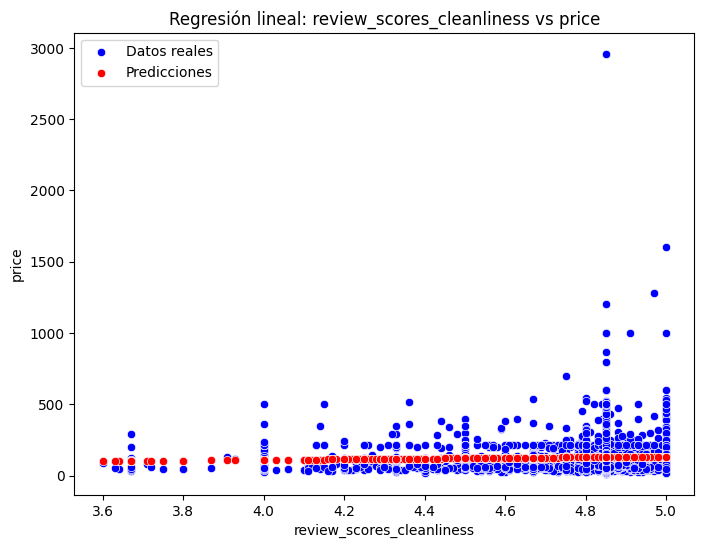

Coeficiente de correlación (r): 0.04844672675664221
Coeficiente de determinación (R^2): 0.0023470853334327524
Ecuación de la recta: y = 24.2230x + 12.0365


In [18]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

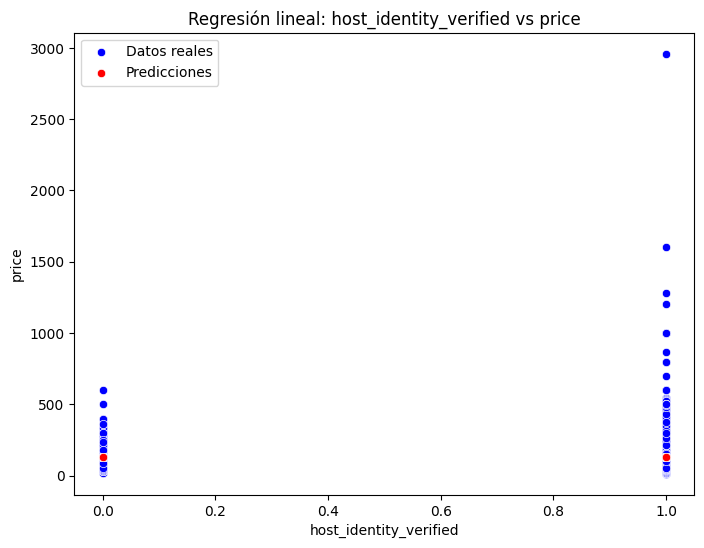

Coeficiente de correlación (r): 0.0017536943915652118
Coeficiente de determinación (R^2): 3.0754440190072785e-06
Ecuación de la recta: y = -0.7487x + 129.2129


In [19]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

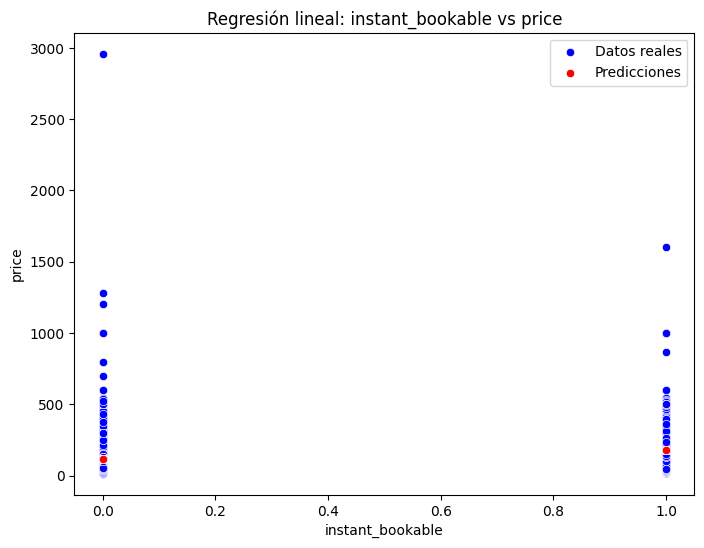

Coeficiente de correlación (r): 0.22821873808816198
Coeficiente de determinación (R^2): 0.052083792414553076
Ecuación de la recta: y = 66.0524x + 114.1662


In [20]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

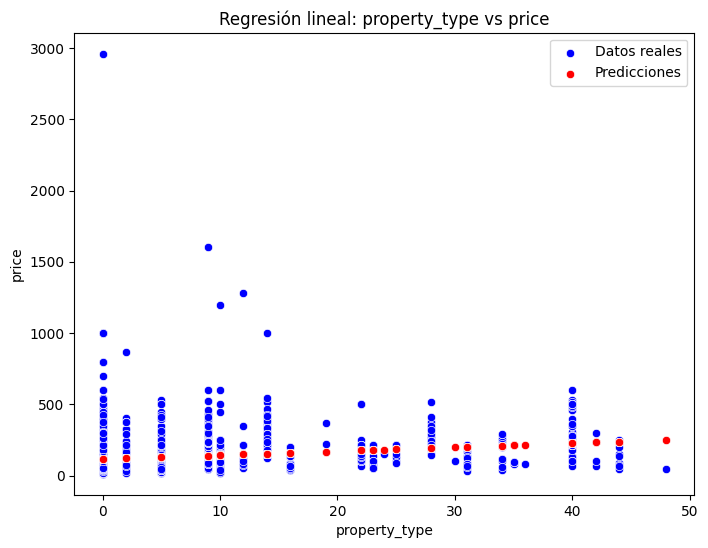

Coeficiente de correlación (r): 0.20135519115763134
Coeficiente de determinación (R^2): 0.04054391300612625
Ecuación de la recta: y = 2.8037x + 115.3682


In [21]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

**Shared room**

In [22]:
#Filtramos el dataframe para Private room
df_filtrado3 = df[df['room_type'] == 'Shared room']
df3 = df_filtrado3[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df3

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
410480,Shared room,25.0,0.900000,f,1.0,1.0,5.00,f,t,Shared room in rental unit
699290,Shared room,24.0,0.890000,f,1.0,1.0,4.56,f,t,Shared room in rental unit
737797,Shared room,35.0,0.910000,f,1.0,1.0,5.00,f,t,Shared room in rental unit
1013746,Shared room,170.0,0.848627,f,1.0,1.0,5.00,f,t,Shared room in condo
2087391,Shared room,60.0,0.270000,f,1.0,1.0,4.91,f,t,Shared room in rental unit
...,...,...,...,...,...,...,...,...,...,...
1207066199761814925,Shared room,32.0,0.900000,f,2.0,1.0,4.85,f,t,Shared room in rental unit
1212140790386773963,Shared room,50.0,0.970000,f,1.0,1.0,4.33,t,t,Shared room in bed and breakfast
1219425609291141829,Shared room,50.0,0.970000,f,1.0,1.0,4.85,t,t,Shared room in bed and breakfast


In [23]:
#Convertimos las variables de tipo string a enteros 
df3.loc[:, 'host_is_superhost'] = df3['host_is_superhost'].map({'t': 1, 'f': 0})
df3.loc[:, 'instant_bookable'] = df3['instant_bookable'].map({'t': 1, 'f': 0})
df3.loc[:, 'host_identity_verified'] = df3['host_identity_verified'].map({'t': 1, 'f': 0})
df3.loc[:, 'property_type'] = df3['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
})
df3

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
410480,Shared room,25.0,0.900000,0,1.0,1.0,5.00,0,1,6
699290,Shared room,24.0,0.890000,0,1.0,1.0,4.56,0,1,6
737797,Shared room,35.0,0.910000,0,1.0,1.0,5.00,0,1,6
1013746,Shared room,170.0,0.848627,0,1.0,1.0,5.00,0,1,15
2087391,Shared room,60.0,0.270000,0,1.0,1.0,4.91,0,1,6
...,...,...,...,...,...,...,...,...,...,...
1207066199761814925,Shared room,32.0,0.900000,0,2.0,1.0,4.85,0,1,6
1212140790386773963,Shared room,50.0,0.970000,0,1.0,1.0,4.33,1,1,46
1219425609291141829,Shared room,50.0,0.970000,0,1.0,1.0,4.85,1,1,46


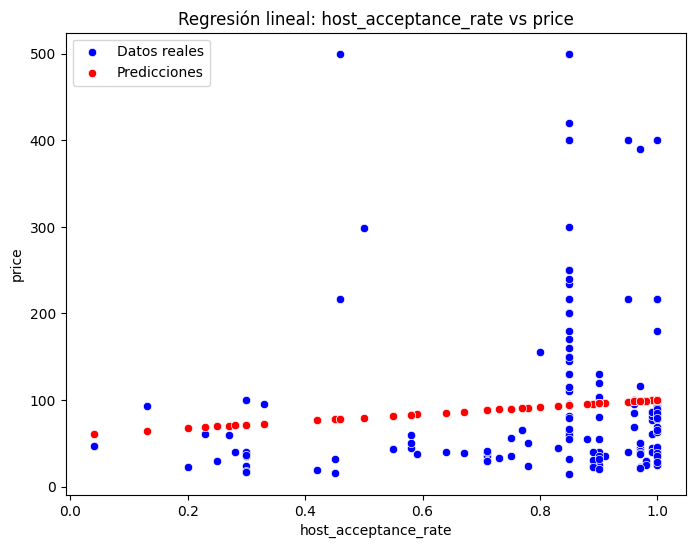

Coeficiente de correlación (r): 0.10018173558647629
Coeficiente de determinación (R^2): 0.01003638014511865
Ecuación de la recta: y = 41.0704x + 59.1023


In [24]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

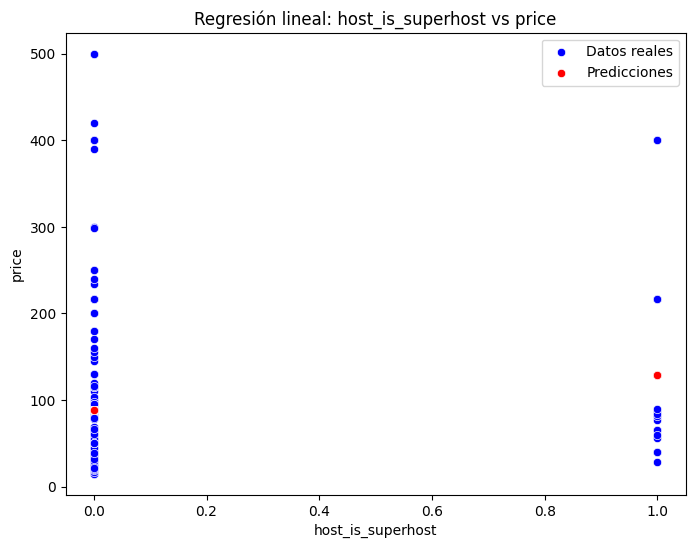

Coeficiente de correlación (r): 0.1233806546583936
Coeficiente de determinación (R^2): 0.015222785943933781
Ecuación de la recta: y = 40.1688x + 88.1064


In [25]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

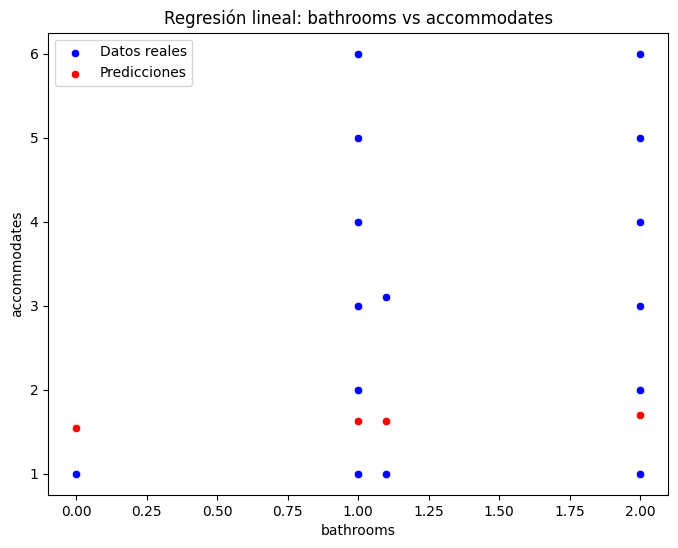

Coeficiente de correlación (r): 0.02899884098361959
Coeficiente de determinación (R^2): 0.0008409327783932552
Ecuación de la recta: y = 0.0798x + 1.5422


In [26]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

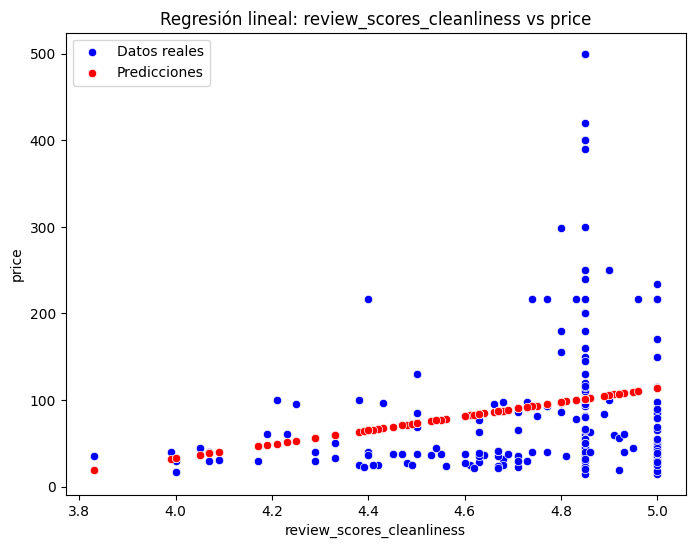

Coeficiente de correlación (r): 0.21422047071211375
Coeficiente de determinación (R^2): 0.04589041007211958
Ecuación de la recta: y = 81.2234x + -292.3439


In [27]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

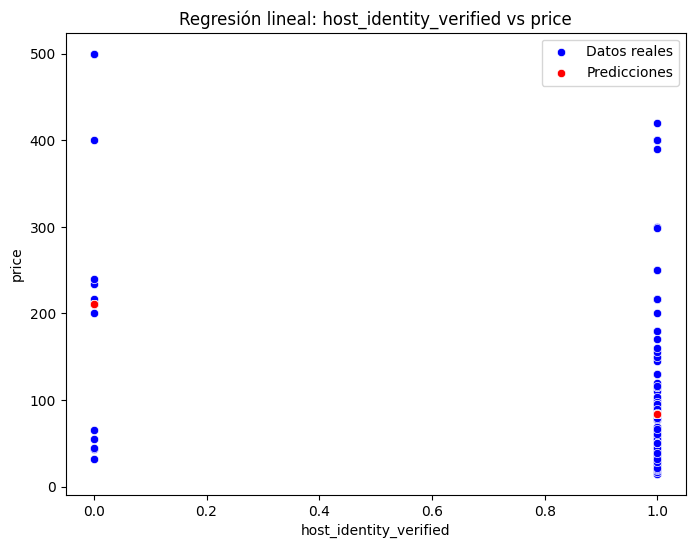

Coeficiente de correlación (r): 0.3253748404101097
Coeficiente de determinación (R^2): 0.10586878677190437
Ecuación de la recta: y = -127.3585x + 210.9154


In [28]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

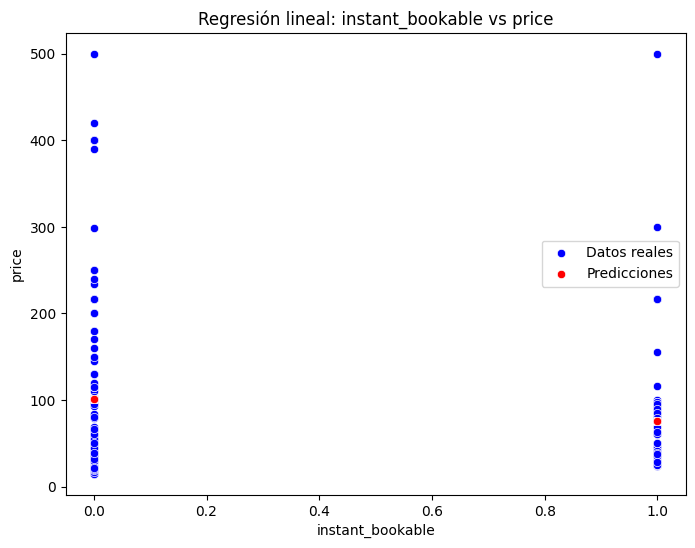

Coeficiente de correlación (r): 0.11901727208822456
Coeficiente de determinación (R^2): 0.014165111055322477
Ecuación de la recta: y = -24.5494x + 100.7906


In [29]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

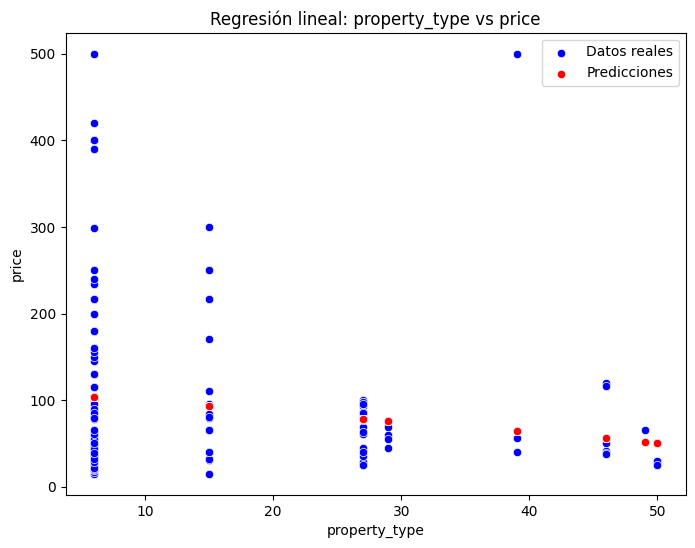

Coeficiente de correlación (r): 0.165023515432313
Coeficiente de determinación (R^2): 0.027232760645638843
Ecuación de la recta: y = -1.1941x + 110.7098


In [30]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

**Hotel room**

In [31]:
#Filtramos el dataframe para Private room
df_filtrado4 = df[df['room_type'] == 'Hotel room']
df4 = df_filtrado4[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df4

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
4947747,Hotel room,203.000000,0.97,f,4.0,1.0,3.91,t,t,Room in aparthotel
14136800,Hotel room,203.000000,0.97,f,4.0,1.0,4.50,t,t,Room in aparthotel
15530646,Hotel room,81.000000,1.00,f,1.0,1.1,4.63,t,t,Room in hostel
22041666,Hotel room,124.000000,0.99,f,2.0,1.0,4.80,t,t,Room in bed and breakfast
22822071,Hotel room,220.000000,1.00,f,2.0,1.0,5.00,t,t,Room in hostel
22286152,Hotel room,189.000000,0.99,f,4.0,1.0,4.85,t,t,Room in bed and breakfast
22286293,Hotel room,191.000000,0.99,f,4.0,1.0,4.85,t,t,Room in bed and breakfast
22950049,Hotel room,216.984656,1.00,f,1.0,1.0,4.85,t,t,Room in hostel
29899883,Hotel room,151.000000,1.00,f,1.0,1.0,4.89,t,t,Room in hotel


In [32]:
#Convertimos las variables de tipo string a enteros 
df4.loc[:, 'host_is_superhost'] = df4['host_is_superhost'].map({'t': 1, 'f': 0})
df4.loc[:, 'instant_bookable'] = df4['instant_bookable'].map({'t': 1, 'f': 0})
df4.loc[:, 'host_identity_verified'] = df4['host_identity_verified'].map({'t': 1, 'f': 0})
df4.loc[:, 'property_type'] = df4['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
})
df4

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
4947747,Hotel room,203.000000,0.97,0,4.0,1.0,3.91,1,1,19
14136800,Hotel room,203.000000,0.97,0,4.0,1.0,4.50,1,1,19
15530646,Hotel room,81.000000,1.00,0,1.0,1.1,4.63,1,1,32
22041666,Hotel room,124.000000,0.99,0,2.0,1.0,4.80,1,1,37
22822071,Hotel room,220.000000,1.00,0,2.0,1.0,5.00,1,1,32
22286152,Hotel room,189.000000,0.99,0,4.0,1.0,4.85,1,1,37
22286293,Hotel room,191.000000,0.99,0,4.0,1.0,4.85,1,1,37
22950049,Hotel room,216.984656,1.00,0,1.0,1.0,4.85,1,1,32
29899883,Hotel room,151.000000,1.00,0,1.0,1.0,4.89,1,1,40


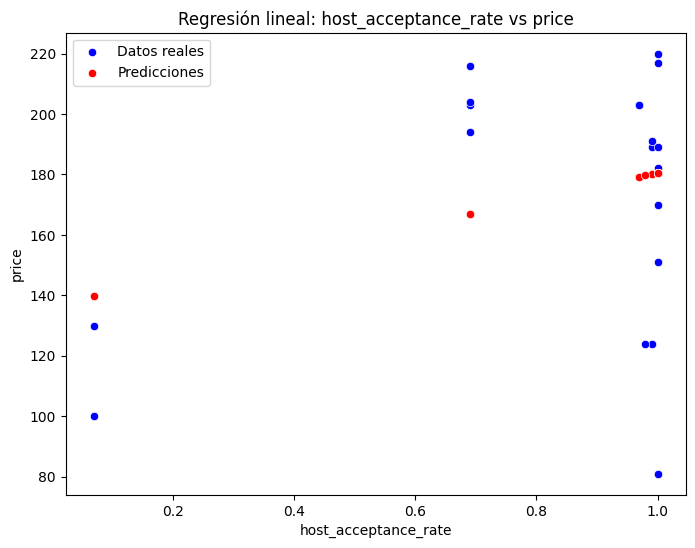

Coeficiente de correlación (r): 0.3082559223092921
Coeficiente de determinación (R^2): 0.09502171363875234
Ecuación de la recta: y = 43.9114x + 136.7170


In [33]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

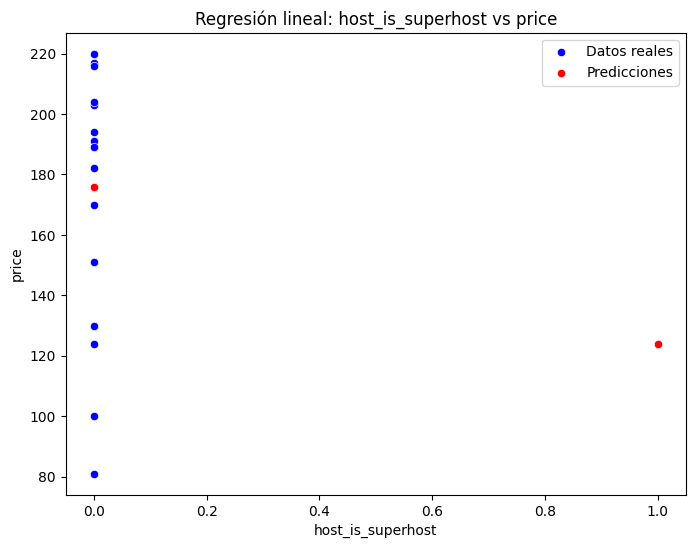

Coeficiente de correlación (r): 0.2828595557755816
Coeficiente de determinación (R^2): 0.08000952829355934
Ecuación de la recta: y = -51.9436x + 175.9436


In [34]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

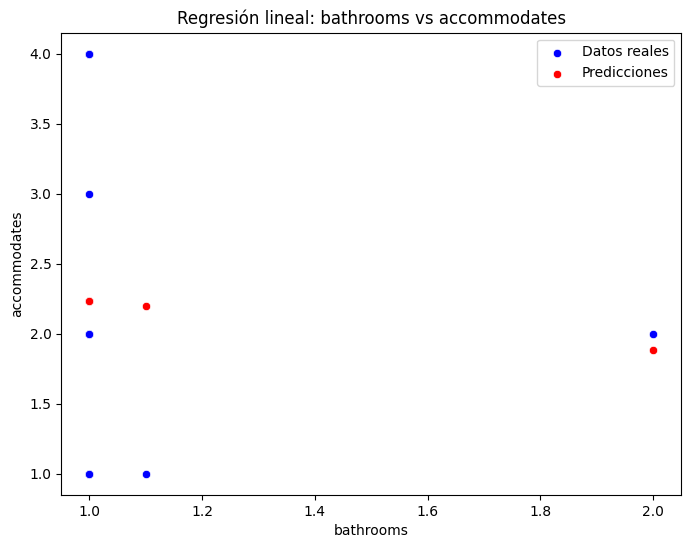

Coeficiente de correlación (r): 0.07410246914548832
Coeficiente de determinación (R^2): 0.005491175933458048
Ecuación de la recta: y = -0.3504x + 2.5812


In [35]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

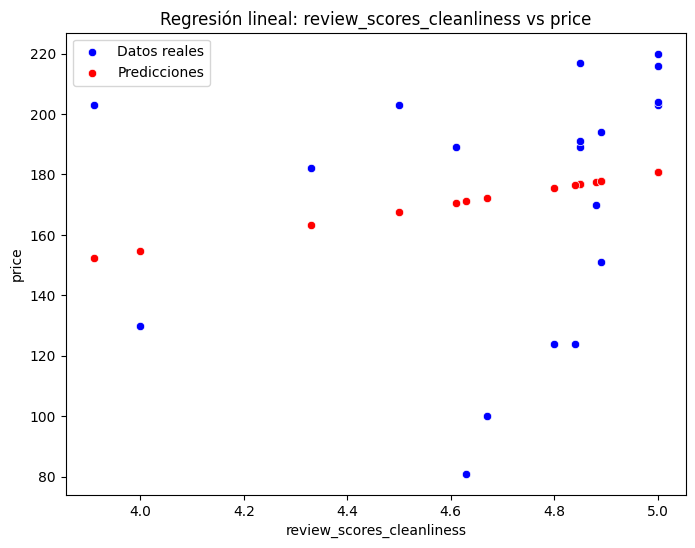

Coeficiente de correlación (r): 0.19964453083359215
Coeficiente de determinación (R^2): 0.03985793869176513
Ecuación de la recta: y = 26.1335x + 50.1072


In [36]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

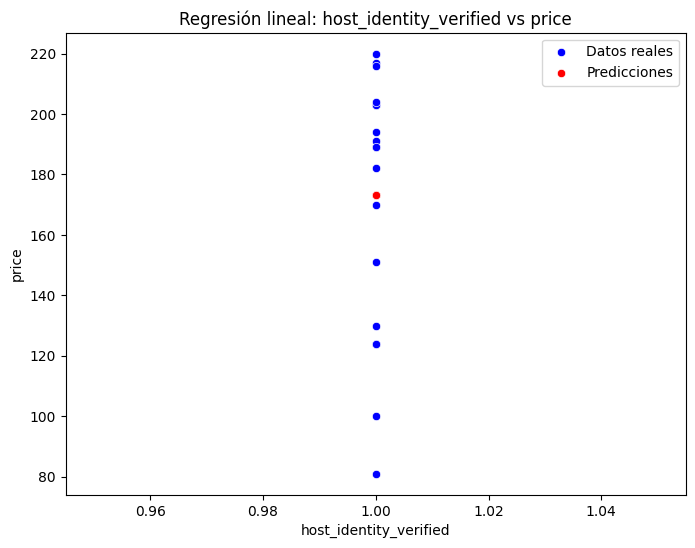

Coeficiente de correlación (r): 0.0
Coeficiente de determinación (R^2): 0.0
Ecuación de la recta: y = 0.0000x + 173.2097


In [37]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

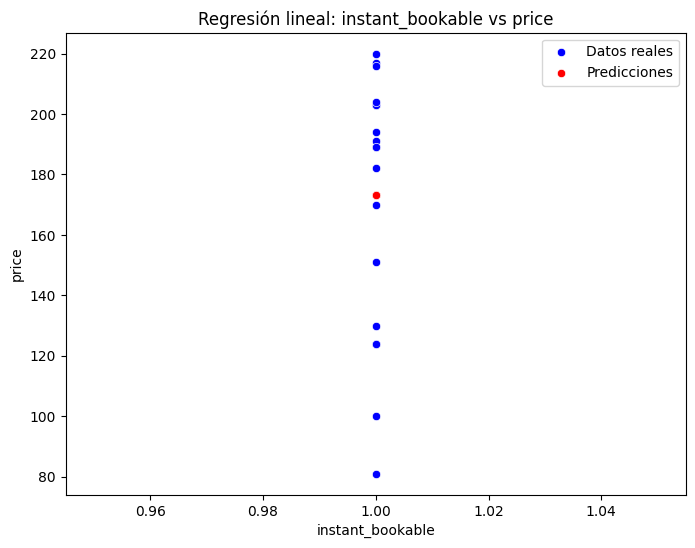

Coeficiente de correlación (r): 0.0
Coeficiente de determinación (R^2): 0.0
Ecuación de la recta: y = 0.0000x + 173.2097


In [38]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

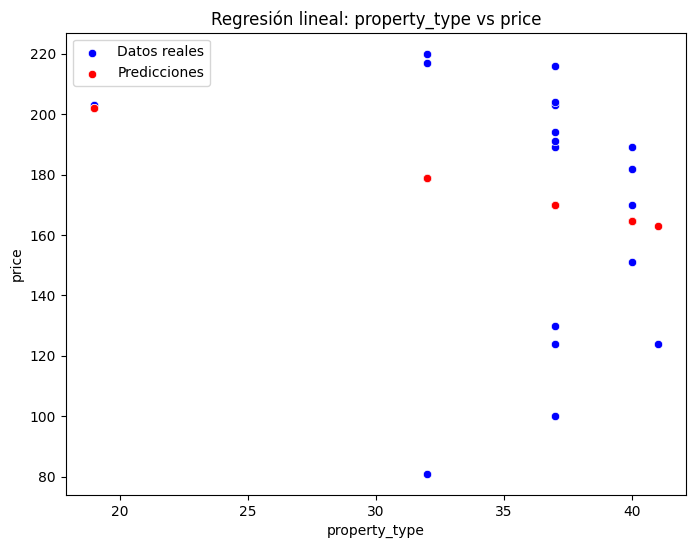

Coeficiente de correlación (r): 0.26521199198043394
Coeficiente de determinación (R^2): 0.07033740069022976
Ecuación de la recta: y = -1.7784x + 235.7337


In [39]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")